# 53. ヒートマップとクラスタリング

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
flight_dframe = sns.load_dataset('flights')

In [3]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [4]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')

In [5]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


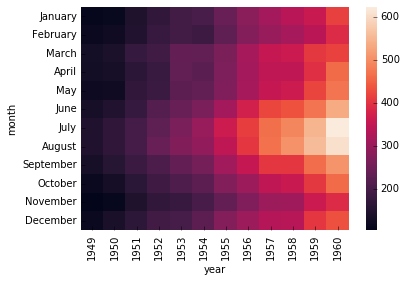

In [6]:
sns.heatmap(flight_dframe)

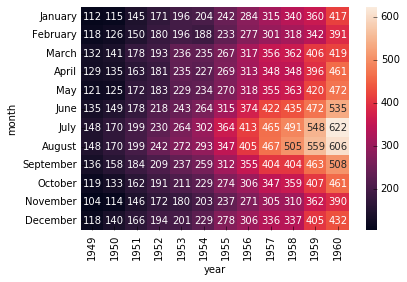

In [7]:
# 数字を書き込める
sns.heatmap(flight_dframe, annot = True, fmt = 'd')

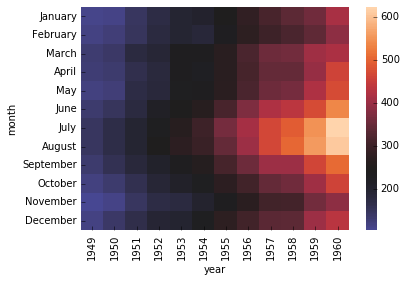

In [8]:
# 中心を指定して、色を変えられる
sns.heatmap(flight_dframe, center = flight_dframe.loc['January', 1955])

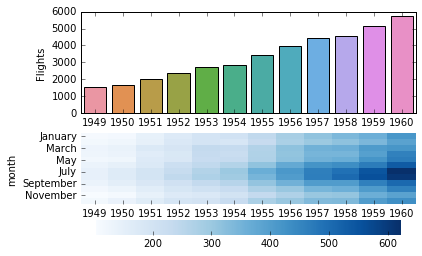

In [9]:
# 描画領域を2行1列に
f, (axis1, axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

# 上の図
year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)

# 下の図
# cbarはカラーバー。右ではなく下に水平に描く
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

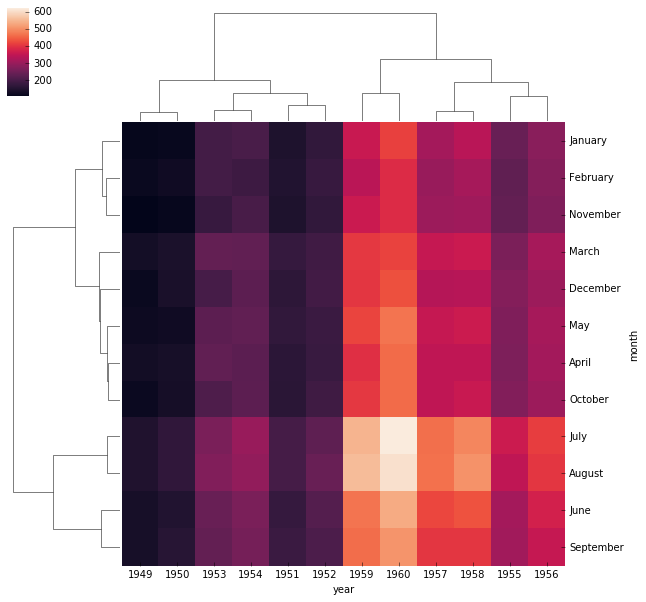

In [10]:
sns.clustermap(flight_dframe)

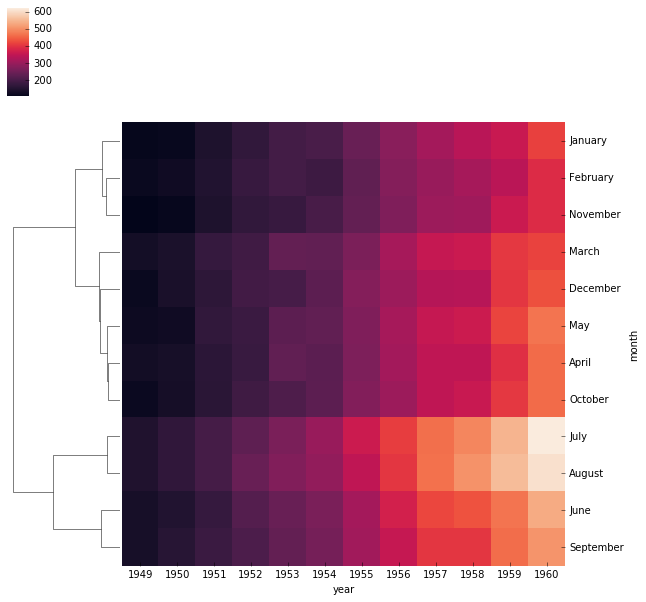

In [12]:
sns.clustermap(flight_dframe, col_cluster = False)

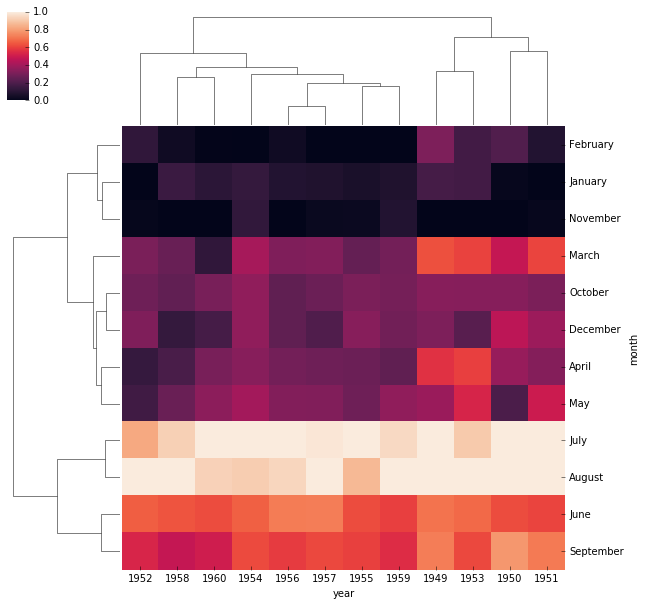

In [13]:
# データの標準化
# 列方向
sns.clustermap(flight_dframe, standard_scale = 1)

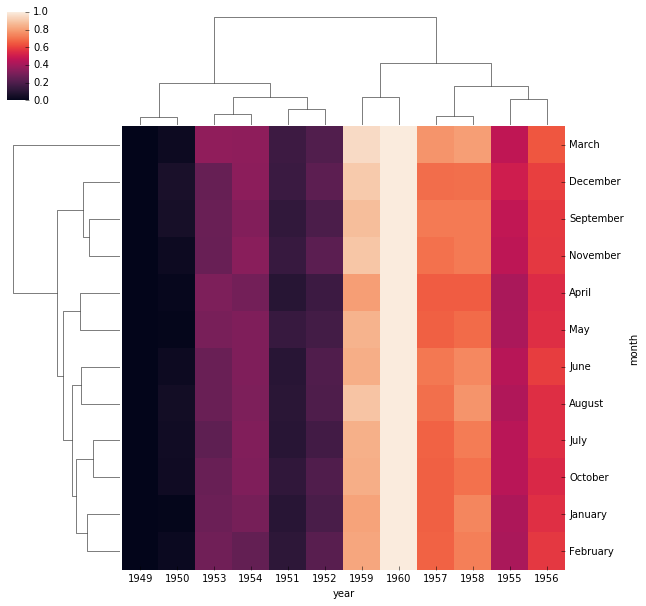

In [14]:
# 行方向
sns.clustermap(flight_dframe, standard_scale = 0)

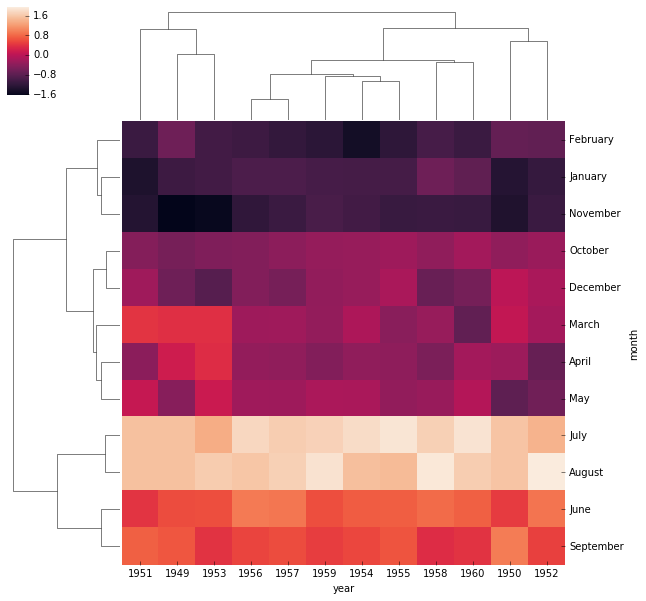

In [15]:
# z_score
# 標準化
sns.clustermap(flight_dframe, z_score = 1)